<a href="https://colab.research.google.com/github/AtharvaAnupWasnik3021/-Antimatter-vs-Matter-Classification-using-Physics-Inspired-Features-and-Ensemble-Learning/blob/main/ML_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer          10 non-null     object
 1   Candies (#)       10 non-null     int64 
 2   Mangoes (Kg)      10 non-null     int64 
 3   Milk Packets (#)  10 non-null     int64 
 4   Payment (Rs)      10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes
3
['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']
0    386
1    289
2    393
3    110
4    280
5    167
6    271
7    274
8    148
9    198
Name: Payment (Rs), dtype: int64
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)
0      C_1           20             6                 2
1      C_2           16             3                 6
2      C_3           27             6                 2
3      C_4           19             1                 2
4      C_5           24             4

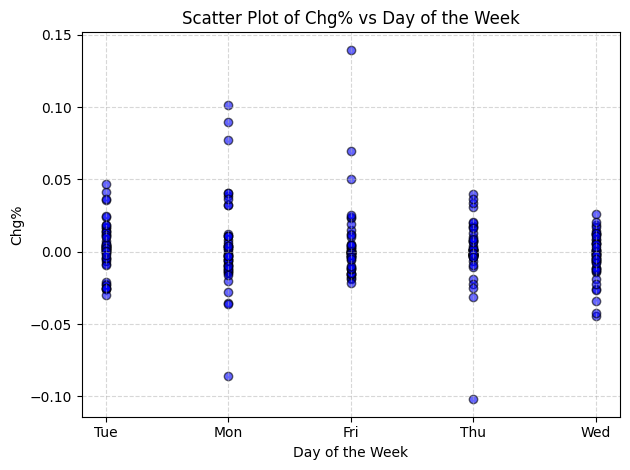

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   object
 14  tumor   

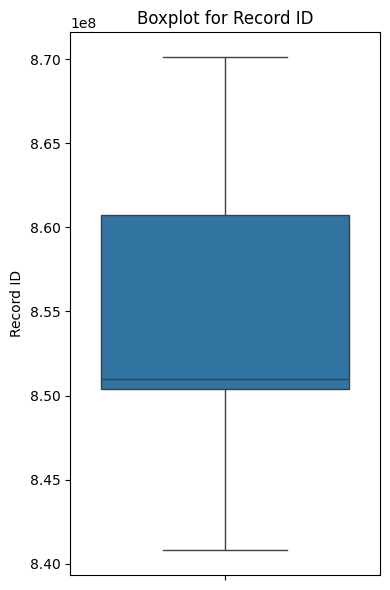

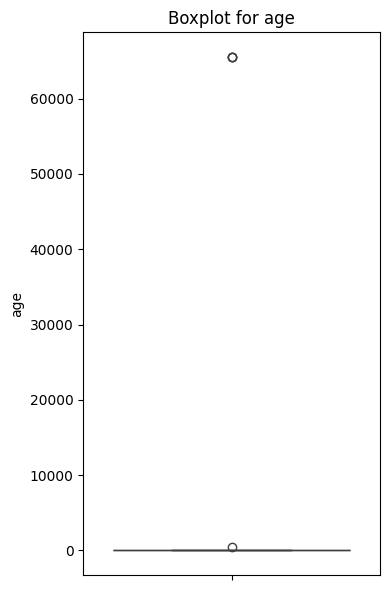

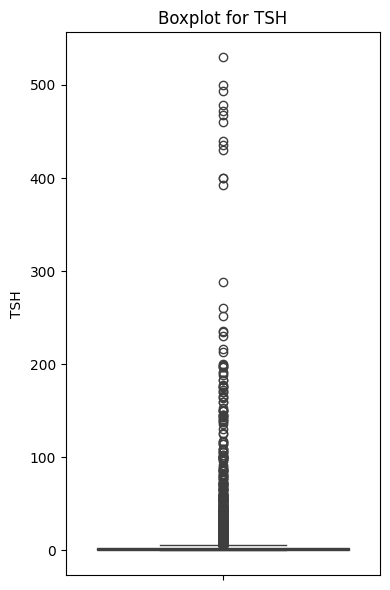

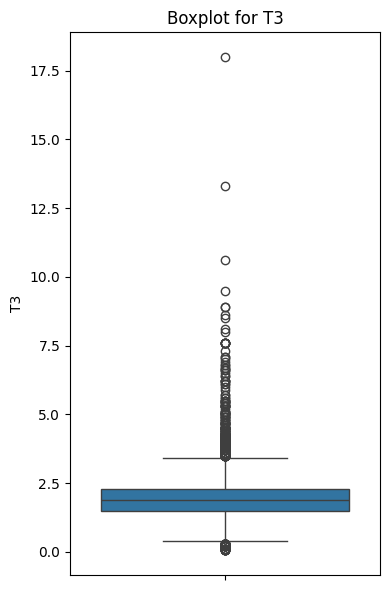

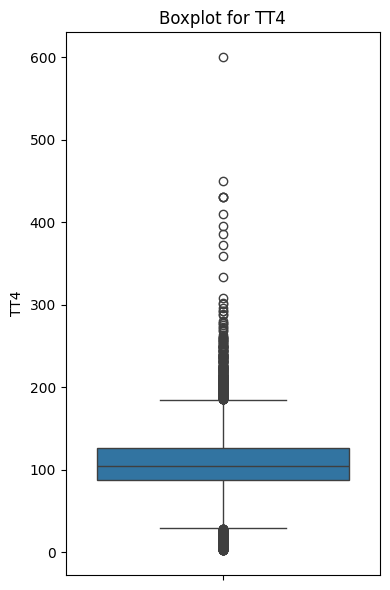

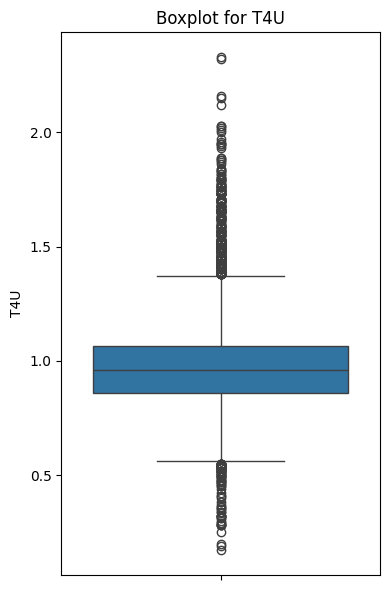

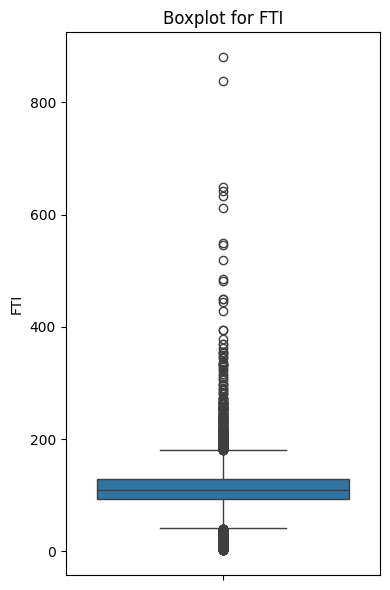

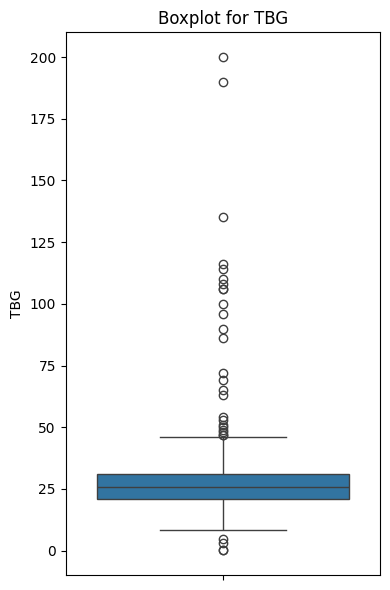

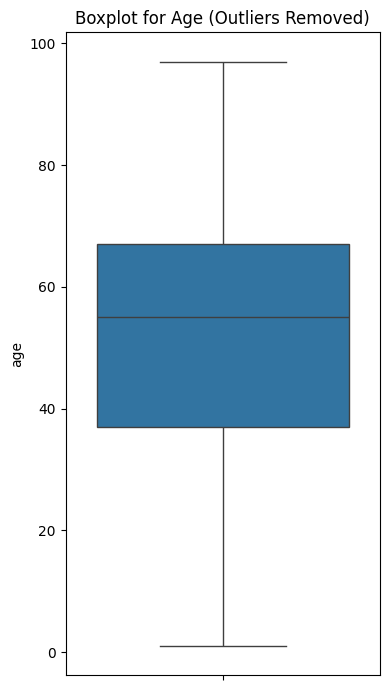

Jaccard Coefficient: 0.4
Simple Matching Coefficient (SMC): 0.8571428571428571
Cosine Similarity: 0.5773502691896258


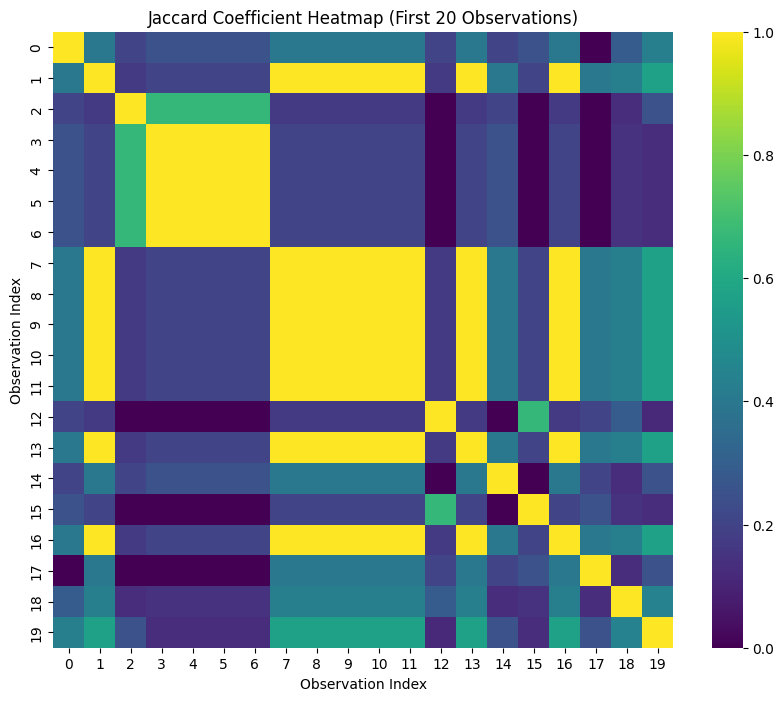

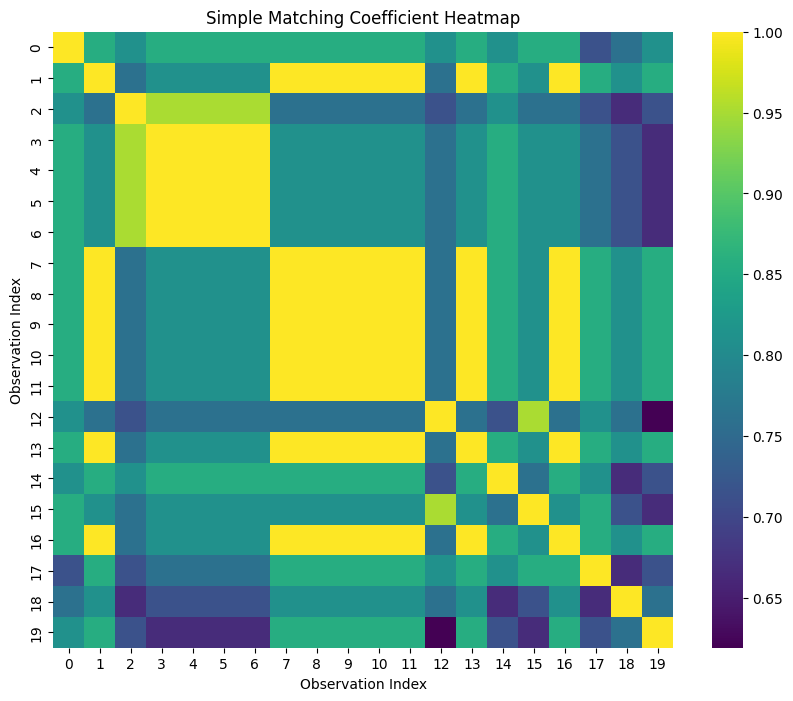

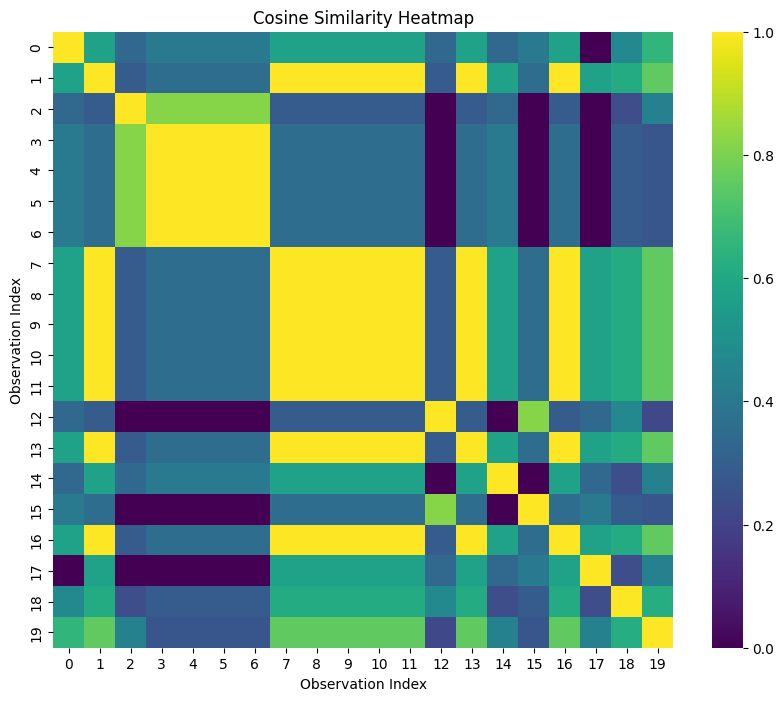

   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured    TT4 T4U measured   T4U FTI measured    FTI TBG measured  \
0            f  104.0            f  0.96            f  109.0            f   
1            t  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from scipy import stats
import statistics

# ---- SECTION: Purchase Data ----

def load_purchase_data(path, sheet):
    # Load and select columns
    df = pd.read_excel(path, sheet_name=sheet)
    df = df.iloc[:, :5]
    df.info()
    return df

def get_shape(df):
    #A1 1,2)
    return df.shape

def get_matrix_rank(df):
    #A1 3)
    print(np.linalg.matrix_rank(df.iloc[1:, 1:]))
def get_column_details(df):
    #A1 4)
    A = df.columns.tolist()
    print(A)
    B = df.iloc[:, 4]
    print(B)
    X = df.iloc[:, :4]
    print(X)
    return A, B, X

def add_rich_column(df):
    #A2
    df["Rich"] = df.iloc[:, 4].apply(lambda x: "Rich" if x > 200 else "POOR")
    print(df)
    return df

# ---- SECTION: IRCTC Stock Price Data ----
def load_irctc_data(path, sheet):
    data2 = pd.read_excel(path, sheet_name=sheet)
    print(data2.head())
    return data2

def compute_basic_statistics(data2):
    #A3 1)
    print(statistics.mean(data2.iloc[:, 3]))
    print(statistics.variance(data2["Price"]))

def mean_price_on_day(data2, day="Wed"):
    #A3 2)
    d = [data2.iloc[i]["Price"] for i in range(data2.shape[0]) if data2.iloc[i]["Day"] == day]
    print(statistics.mean(d))

def mean_price_in_month(data2, month="Apr"):
    #A3 3)
    d = [data2.iloc[i]["Price"] for i in range(data2.shape[0]) if data2.iloc[i]["Month"] == month]
    print(statistics.mean(d))

def mean_negative_change(data2):
    #A3 4)
    d = [data2.iloc[i]["Chg%"] for i in range(data2.shape[0]) if data2.iloc[i]["Chg%"] < 0]
    print(statistics.mean(d))
def positive_chg_wed_vs_others(data2):
    #A3 5)
    d, k = [], []
    for i in range(data2.shape[0]):
        if data2.iloc[i]["Chg%"] > 0 and data2.iloc[i]["Day"] == "Wed":
            d.append(data2.iloc[i]["Chg%"])
        elif data2.iloc[i]["Chg%"] > 0:
            k.append(data2.iloc[i]["Chg%"])
    print(len(d)/(len(k)+len(d)))

def positive_chg_fraction_on_wed(data2):
    #A3 6)
    Wed_Prof, Wed = 0, 0
    for i in range(data2.shape[0]):
        if data2.iloc[i]["Chg%"] > 0 and data2.iloc[i]["Day"] == "Wed":
            Wed_Prof += 1
            Wed += 1
        elif data2.iloc[i]["Day"] == "Wed":
            Wed += 1
    print(Wed_Prof/Wed)
def plot_chg_vs_day(data2):
    #A3 7)
    plt.scatter(data2["Day"], data2["Chg%"], alpha=0.6, color='blue', edgecolor='black')
    plt.title("Scatter Plot of Chg% vs Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Chg%")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# ---- SECTION: Thyroid Data ----

def load_thyroid_data(path, sheet):
    #A4
    data3 = pd.read_excel(path, sheet_name=sheet)
    print(data3.info())
    return data3

def encode_thyroid_data(data3, ordinal_cols, onehot_cols):
    encoder = OrdinalEncoder()
    data_3_ord = encoder.fit_transform(data3[ordinal_cols])
    data_3_ord_df = pd.DataFrame(data_3_ord, columns=ordinal_cols)
    print(data_3_ord_df.head())

    OneHot = OneHotEncoder(sparse_output=False, drop='first')
    data_3_onehot = OneHot.fit_transform(data3[onehot_cols])
    col_names = OneHot.get_feature_names_out(onehot_cols)
    enc_data = pd.DataFrame(data_3_onehot, columns=col_names)
    print(enc_data.head())
    return data_3_ord_df, enc_data

def analyze_numerical_columns(data3, num_cols):
    for x in num_cols:
        data3[x] = pd.to_numeric(data3[x], errors='coerce')
        min_num = data3[x].min()
        max_num = data3[x].max()
        print(f"column {x} range is {min_num} to {max_num}")
        missing_vals = data3[x].isna().sum()
        print(f"column {x} has {missing_vals} missing values")
    return data3
def plot_all_boxplots(df):
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        plt.figure(figsize=(4, 6))
        sns.boxplot(y=df[col].dropna())
        plt.title(f"Boxplot for {col}")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

def plot_age_boxplot_no_outliers(df):
    age = df['age'].dropna()
    Q1 = age.quantile(0.25)
    Q3 = age.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    age_no_outliers = age[(age >= lower_bound) & (age <= upper_bound)]

    plt.figure(figsize=(4, 7))
    sns.boxplot(y=age_no_outliers)
    plt.title("Boxplot for Age (Outliers Removed)")
    plt.ylabel("age")
    plt.tight_layout()
    plt.show()
def calc_jaccard_and_smc(enc_data):
    #A5
    obs1 = enc_data.iloc[0].astype(int).tolist()
    obs2 = enc_data.iloc[1].astype(int).tolist()
    f11 = sum(a == b == 1 for a, b in zip(obs1, obs2))
    f00 = sum(a == b == 0 for a, b in zip(obs1, obs2))
    f10 = sum(a == 1 and b == 0 for a, b in zip(obs1, obs2))
    f01 = sum(a == 0 and b == 1 for a, b in zip(obs1, obs2))
    den_jc = f11 + f10 + f01
    jc = f11 / den_jc if den_jc > 0 else 0.0
    den_smc = f11 + f10 + f01 + f00
    smc = (f11 + f00) / den_smc if den_smc > 0 else 0.0
    print("Jaccard Coefficient:", jc)
    print("Simple Matching Coefficient (SMC):", smc)

def calc_cosine_similarity(enc_data):
    #A6
    vec1 = enc_data.iloc[0].astype(int).to_numpy()
    vec2 = enc_data.iloc[1].astype(int).to_numpy()
    cos_sim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    print("Cosine Similarity:", cos_sim)

def pairwise_similarity_heatmaps(enc_data):
    data_20 = enc_data.iloc[:20].astype(int).to_numpy()
    n = data_20.shape[0]
    jc_matrix = np.zeros((n, n))
    smc_matrix = np.zeros((n, n))
    cos_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            a, b = data_20[i], data_20[j]
            f11 = np.sum((a == 1) & (b == 1))
            f00 = np.sum((a == 0) & (b == 0))
            f10 = np.sum((a == 1) & (b == 0))
            f01 = np.sum((a == 0) & (b == 1))
            denom_jc = f11 + f10 + f01
            jc_matrix[i, j] = f11 / denom_jc if denom_jc > 0 else 0.0
            total = f11 + f10 + f01 + f00
            smc_matrix[i, j] = (f11 + f00) / total if total > 0 else 0.0
            cos_sim = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
            cos_matrix[i, j] = cos_sim


    def plot_heatmap(matrix, title):
        #A7
        plt.figure(figsize=(10, 8))
        sns.heatmap(matrix, annot=False, cmap='viridis')
        plt.title(title)
        plt.xlabel("Observation Index")
        plt.ylabel("Observation Index")
        plt.show()

    plot_heatmap(jc_matrix, "Jaccard Coefficient Heatmap (First 20 Observations)")
    plot_heatmap(smc_matrix, "Simple Matching Coefficient Heatmap")
    plot_heatmap(cos_matrix, "Cosine Similarity Heatmap")

def impute_missing_values(data3):
    #A8
    data_imputed = data3.copy()
    for col in data_imputed.columns:
        if data_imputed[col].isnull().sum() == 0:
            continue
        if pd.api.types.is_numeric_dtype(data_imputed[col]):
            col_data = data_imputed[col].dropna()
            z_scores = np.abs(stats.zscore(col_data))
            has_outliers = (z_scores > 3).any()
            imputed_value = col_data.median() if has_outliers else col_data.mean()
            data_imputed[col] = data_imputed[col].fillna(imputed_value)
        else:
            imputed_value = data_imputed[col].mode()[0]
            data_imputed[col] = data_imputed[col].fillna(imputed_value)
    print(data_imputed.head())
    return data_imputed
def normalize_numeric_columns(df, cols_to_replace, use_standard=True):
    df[cols_to_replace] = df[cols_to_replace].replace('?', pd.NA)
    for col in cols_to_replace:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df_cleaned = df.copy()
    df_cleaned[cols_to_replace] = df_cleaned[cols_to_replace].astype(float)
    for col in cols_to_replace:
        if df_cleaned[col].isna().sum() > 0:
            df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
    scaler = StandardScaler() if use_standard else MinMaxScaler()
    df_scaled = df_cleaned.copy()
    df_scaled[cols_to_replace] = scaler.fit_transform(df_cleaned[cols_to_replace])
    print(df_scaled[cols_to_replace].head())
    return df_scaled

# ----- MAIN EXECUTION BLOCK -----

def main():
    # Purchase data
    df = load_purchase_data(r'/content/Lab Session Data.xlsx', 'Purchase data')
    get_shape(df)
    get_matrix_rank(df)
    get_column_details(df)
    add_rich_column(df)

    # IRCTC stock data
    data2 = load_irctc_data(r'/content/Lab Session Data.xlsx', 'IRCTC Stock Price')
    compute_basic_statistics(data2)
    mean_price_on_day(data2, day="Wed")
    mean_price_in_month(data2, month="Apr")
    mean_negative_change(data2)
    positive_chg_wed_vs_others(data2)
    positive_chg_fraction_on_wed(data2)
    plot_chg_vs_day(data2)

    # Thyroid data
    data3 = load_thyroid_data(r'/content/Lab Session Data.xlsx', 'thyroid0387_UCI')
    ordinal_cols = ["referral source", "Condition"]
    onehot_cols = ["sex", "on thyroxine", "query on thyroxine", "on antithyroid medication", "sick",
                   "pregnant", "thyroid surgery", "I131 treatment", "query hypothyroid", "query hyperthyroid",
                   "lithium", "goitre", "tumor", "hypopituitary", "psych", "TSH measured", "T3 measured",
                   "TT4 measured", "FTI measured", "TBG measured"]
    num_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI", "TBG"]

    data_3_ord_df, enc_data = encode_thyroid_data(data3, ordinal_cols, onehot_cols)
    analyze_numerical_columns(data3, num_cols)
    plot_all_boxplots(data3)
    plot_age_boxplot_no_outliers(data3)
    calc_jaccard_and_smc(enc_data)
    calc_cosine_similarity(enc_data)
    pairwise_similarity_heatmaps(enc_data)
    impute_missing_values(data3)

    cols_to_replace = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'age']
    normalize_numeric_columns(
        pd.read_excel(r'/content/Lab Session Data.xlsx', sheet_name="thyroid0387_UCI"),
        cols_to_replace,
        use_standard=True
    )

if __name__ == "__main__":
    main()